# Machine Learning for Mobile Package Recommendation

## Table of Contents <a id='back'></a>

* [1. Introduction](#intro)
* [2. Initiation](#init)
* [3. Data Overview](#overview)
* [4. Define Features and Target](#def)
* [5. Model Training and Validation](#train)
	* [5.1. Decision Tree Classifier](#dt)
	* [5.2. Random Forest Classifier](#rf)
	* [5.3. Logistic Regression](#lr)
* [6. General Conclusion](#end)

## 1. Introduction <a id='intro'></a>

### 1.1. Project Description

Megaline, the mobile operator, is dissatisfied because many of their customers are still using old packages. The company wants to develop a model that can analyze consumer behavior and recommend one of their two latest packages: Smart or Ultra.

You have access to customer behavior data from those who have switched to the new packages (from the Statistical Data Analysis course project). In this classification task, you need to develop a model that can accurately select the package. Since you have completed the data preprocessing steps, you can proceed directly to the model creation stage.

Develop a model with the highest possible accuracy. For this project, the threshold for the accuracy level is set at 0.75. Evaluate the accuracy metric of your model using the test dataset.

### 1.2. Objectives

Develop a model with the highest accuracy with minimum threshold of 0.75.

### 1.3. Data Description

The dataset includes these columns:
* сalls — total calls
* minutes — total calls duration in minutes
* messages — total messages
* mb_used — internet usage in MB
* is_ultra — current package subscription (Ultra - 1, Smart - 0)

### 1.4. Methodology

The steps for this research are as stated below:
1. Initial data exploration
2. Defining features and target column
3. Model training and validation
4. Result and conclusion

[back to table of contents](#back)

## 2. Initiation <a id='init'></a>

### 2.1. Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.2. Load Dataset

In [2]:
df = pd.read_csv('datasets/users_behavior.csv')

[back to table of contents](#back)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pemuatan dataset sudah bagus.
</div>

## 3. Data Overview <a id='overview'></a>

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.duplicated().sum()

0

No missing values, duplicates, redundants, or invalid data.

[back to table of contents](#back)

## 4. Define Features and Target <a id='def'></a>

We will set all the columns in the dataset except `is_ultra` column as the features for the model as we see that these features are independent. The target for the model will be `is_ultra` column.

In [6]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Then we will split the dataset into training dataset and validation dataset with 75% of the dataset goes to training dataset and the rest 25% goes to validation dataset.

In [7]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1)

features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((2410, 4), (2410,), (804, 4), (804,))

We will set all the columns in the dataset except `is_ultra` column as the features for the model as we see that these features are independent. The target for the model will be `is_ultra` column.

[back to table of contents](#back)

## 5. Model Training and Validation <a id='train'></a>

We will train Decision Tree Classifier, Random Forest Classifier, and Logistic Regression with the dataset with different hyperparameter. We will then pick the best result for each learning algorithm and then pick the best model.

### 5.1. Decision Tree Classifier <a id='dt'></a>

In [8]:
accuracy_score1 = {}

for depth in tqdm(range(1,16)):
    model1 = DecisionTreeClassifier(random_state=1, max_depth=depth)
    model1.fit(features_train, target_train)
    predictions1 = model1.predict(features_valid)
    accuracy_score1[depth] = accuracy_score(target_valid, predictions1)

100%|██████████| 15/15 [00:00<00:00, 134.19it/s]


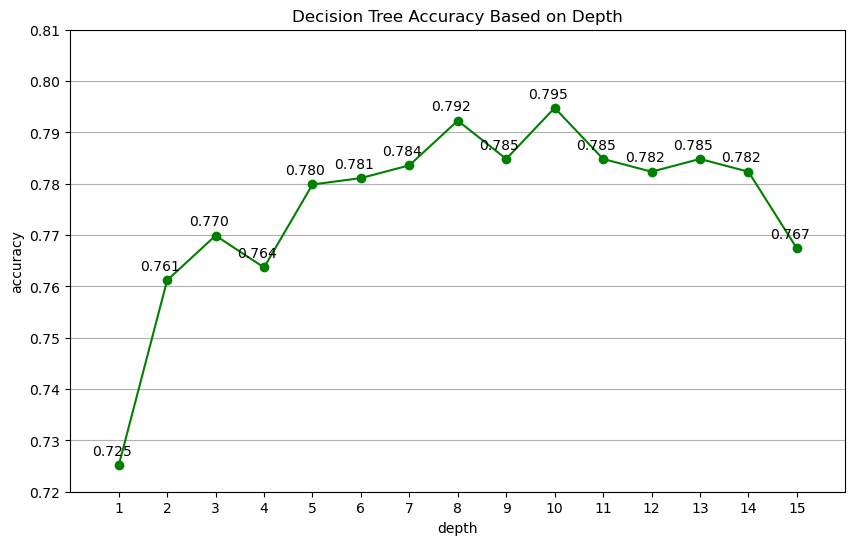

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(accuracy_score1.keys()), list(accuracy_score1.values()), 'go-')

for x, y in accuracy_score1.items():
    ax.annotate(f'{y:.3f}', xy=(x,y), xytext=(-5, 10), textcoords='offset points', ha='center', va='center')    

plt.axis([0,16,0.72,0.81])
plt.xticks(list(accuracy_score1.keys()))
plt.yticks(np.arange(0.72,0.81,0.01))
plt.title("Decision Tree Accuracy Based on Depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.grid(True, axis='y')
plt.show()

In [10]:
max_acc1 = max(list(accuracy_score1.values()))
max_acc1

0.7947761194029851

In [11]:
best_depth1 = list(accuracy_score1.keys())[list(accuracy_score1.values()).index(max_acc1)]
best_depth1

10

In [12]:
best_model1 = DecisionTreeClassifier(random_state=1, max_depth=best_depth1)
best_model1.fit(features_train, target_train)
print('Accuracy score for training dataset = ', best_model1.score(features_train, target_train))
print('Accuracy score for validation dataset = ', best_model1.score(features_valid, target_valid))

Accuracy score for training dataset =  0.8854771784232365
Accuracy score for validation dataset =  0.7947761194029851


The best max depth for Decision Tree Classifier is 10, with the accuracy score of 0.795. As we can see, the model has overfitting problem where it has high score for training dataset but low score for validation dataset.

[back to table of contents](#back)

### 5.2. Random Forest Classifier <a id='rf'></a>

In [13]:
accuracy_score2 = {}
for est in tqdm(range(10,51,10)):
    for depth in tqdm(range(1,16)):
        model2 = RandomForestClassifier(random_state=1, max_depth=depth, n_estimators=est)
        model2.fit(features_train, target_train)
        predictions2 = model2.predict(features_valid)
        accuracy_score2[(est, depth)] = accuracy_score(target_valid, predictions2)

100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


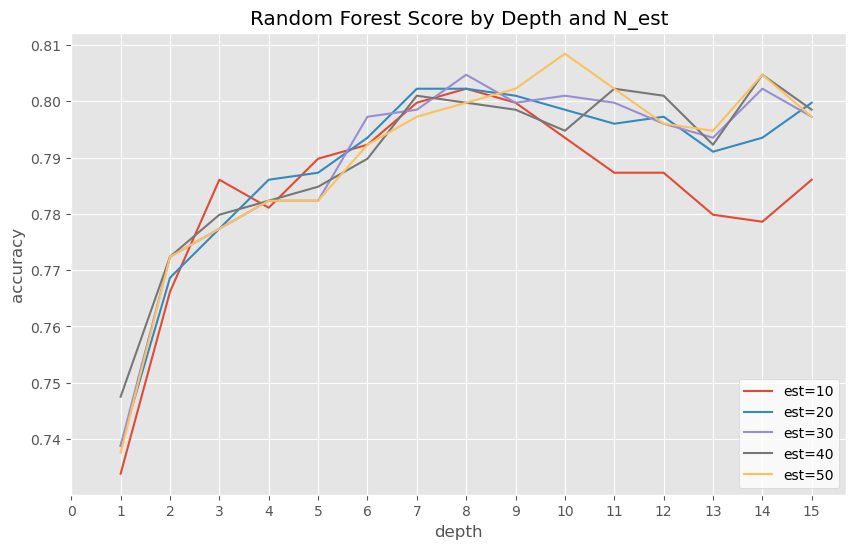

In [14]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,6))

for i in range(0,len(accuracy_score2),15):
    ax.plot([tup[1] for tup in list(accuracy_score2.keys())[i:(i+15)]], list(accuracy_score2.values())[i:(i+15)], label=f'est={(2/3*i+10):.0f}')

ax.set_title('Random Forest Score by Depth and N_est')
ax.set_xlabel('depth')
ax.set_ylabel('accuracy')
ax.legend(loc=4, facecolor='white')
ax.set_xticks(np.arange(0,16))
plt.show()

In [15]:
max_acc2 = max(list(accuracy_score2.values()))
max_acc2

0.8084577114427861

In [16]:
best_est2, best_depth2 = list(accuracy_score2.keys())[list(accuracy_score2.values()).index(max_acc2)]
best_est2, best_depth2

(50, 10)

In [17]:
best_model2 = RandomForestClassifier(random_state=1, max_depth=best_depth2, n_estimators=best_est2)
best_model2.fit(features_train, target_train)
print('Accuracy score for training dataset = ', best_model2.score(features_train, target_train))
print('Accuracy score for validation dataset = ', best_model2.score(features_valid, target_valid))

Accuracy score for training dataset =  0.8908713692946059
Accuracy score for validation dataset =  0.8084577114427861


The best Random Forest Classifier has max depth equals to 10, and n_estimators equals to 50 with the accuracy score of 0.808. As we can see, this model also has overfitting problem where it has high score for training dataset but low score for validation dataset.

[back to table of contents](#back)

### 5.3. Logistic Regression <a id='lr'></a>

In [18]:
model3 = LogisticRegression()
model3.fit(features_train, target_train)
print('Accuracy score for training dataset = ', model3.score(features_train, target_train))
print('Accuracy score for validation dataset = ', model3.score(features_valid, target_valid))

Accuracy score for training dataset =  0.7132780082987552
Accuracy score for validation dataset =  0.6853233830845771


This Logistic Regression model has accuracy score of 0.685. As we can see, this model doesn't have overfitting problem as the scores for training and validation dataset are pretty similar.

[back to table of contents](#back)

## 6. General Conclusion <a id='end'></a>

The **best** model to be used based on **accuracy score** is the **random forest classifier** with **number of estimators** equals to **50** and **max depth** equals to **10**. This model gives the accuracy of **0.808**. Although it has the most accuracy, it is also the **slowest** model out of all. The **second best** model based on **accuracy** is the **decision tree classifier** with **max depth** equals to **10**. This model gives the **accuracy** of **0.795** which is **slightly lower** than those of **random forest classifier**. But this model is **faster** than random forest in terms of execution speed. Lastly, **logistic regression** gives the accuracy of **0.685**. This is the **lowest** accuracy score out of all. But it is the **fastest** model to be executed. In terms of **overfitting**, decision tree and random forest overfit by a **large** margin between training and validation datasets. Whereas logistic regression **doesn't** show much overfitting. For the purpose of prediction, I suggest using **decision tree classifier with max depth equals to 10** because it is fast and provides prediction that is almost as good as random forest classifier. It only gives off 13 more wrong predictions out of 1000 predictions relative to random forest classifier.

[back to table of contents](#back)